In [26]:
#importing necessary libraries 
import keras.optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.layers import Conv2D, Input, ZeroPadding2D 
from keras.layers import BatchNormalization, Activation
from keras.layers import MaxPooling2D, Flatten, Dense,Dropout
from keras.callbacks import TensorBoard
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import imutils

In [3]:
# CNN model 
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'), 
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Metal device set to: Apple M1


2022-03-19 10:14:01.712958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-19 10:14:01.713187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
#Training and validation dataset generation
training_DIR = "./face_mask_dataset/train"
Validation_DIR = "./face_mask_dataset/validation"
train_validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                  )

train_generator = train_validation_datagen.flow_from_directory(training_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150),
                                                    )

validation_generator = train_validation_datagen.flow_from_directory(Validation_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150),
                                                         )

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [14]:
#test dataset geneeration
test_DIR ="./face_mask_dataset/test"
test_datagen = ImageDataGenerator(rescale=1.0/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(test_DIR, 
                                                       batch_size=10,
                                                       shuffle=False,
                                                       target_size=(150,150))


Found 188 images belonging to 2 classes.


In [5]:
#training the model
history = model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              )

Epoch 1/10


2022-03-18 20:25:06.974637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 0.6482 - acc: 0.6256

2022-03-18 20:25:21.451660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 15s 114ms/step - loss: 0.6482 - acc: 0.6256 - val_loss: 0.5184 - val_acc: 0.7784
Epoch 2/10
132/132 [==============================] - 15s 113ms/step - loss: 0.4541 - acc: 0.7945 - val_loss: 0.3809 - val_acc: 0.8196
Epoch 3/10
132/132 [==============================] - 15s 115ms/step - loss: 0.3172 - acc: 0.8775 - val_loss: 0.3118 - val_acc: 0.8969
Epoch 4/10
132/132 [==============================] - 15s 114ms/step - loss: 0.2595 - acc: 0.9003 - val_loss: 0.2210 - val_acc: 0.9330
Epoch 5/10
132/132 [==============================] - 15s 114ms/step - loss: 0.2428 - acc: 0.9041 - val_loss: 0.2608 - val_acc: 0.9278
Epoch 6/10
132/132 [==============================] - 15s 114ms/step - loss: 0.2259 - acc: 0.9056 - val_loss: 0.1534 - val_acc: 0.9485
Epoch 7/10
132/132 [==============================] - 15s 114ms/step - loss: 0.2270 - acc: 0.9148 - val_loss: 0.1086 - val_acc: 0.9639
Epoch 8/10
132/132 [==============================] - 15s 114ms/st

In [9]:
#saving the model in current directory
model.save("saved_model")

2022-03-18 20:30:22.676759: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/assets


In [24]:
## Printing the model accuracy from the test_generator
test_generator.reset() # resetting generator
model.evaluate(test_generator,batch_size=10, verbose=1)

19/19 [==============================] - 1s 55ms/step - loss: 0.2503 - acc: 0.8989


[0.25033143162727356, 0.8989362120628357]

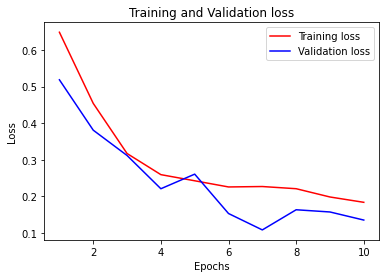

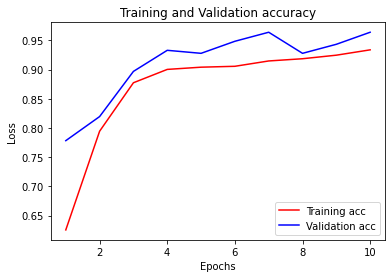

In [21]:
#plotting training and validation loss
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
Epochs = range(1, len(loss) + 1)
plt.plot(Epochs, train_loss, color='red', label='Training loss')
plt.plot(epochs, validation_loss, color='blue', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plotting training and validation accuracy
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
plt.plot(epochs, train_acc, color='red', label='Training acc')
plt.plot(epochs, validation_acc, color='blue', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()